In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Save the dataset into pandas dataframe

In [10]:
# df_boston.head()
df = pd.DataFrame(data= boston.data, columns =  boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Q2: Use different histograms to plot features that have right, left and zero skew.

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

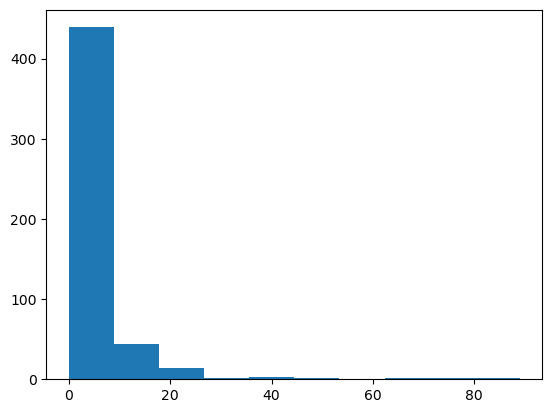

In [59]:
#right skewness
plt.hist(df['CRIM'])
plt.show()

In [21]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

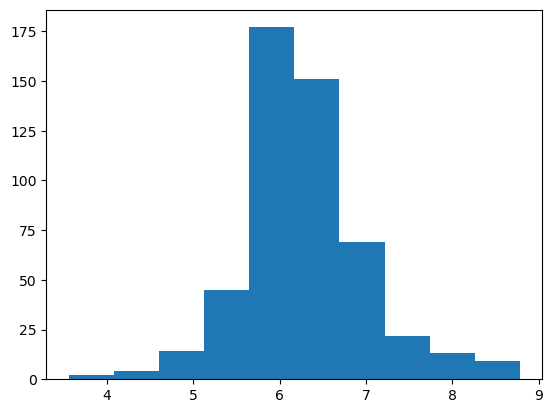

In [20]:
#Zero skew
plt.hist(df['RM'])
plt.show()

In [23]:
df['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

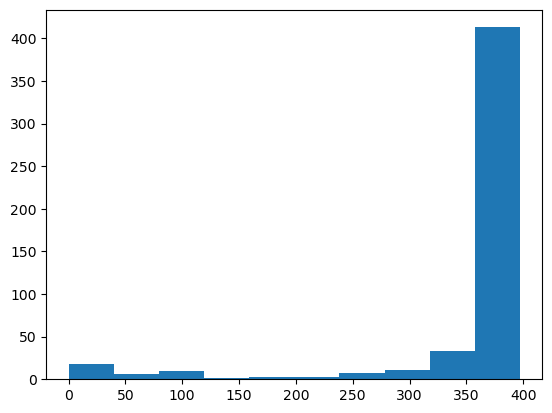

In [22]:
# negative to the left
plt.hist(df['B'])
plt.show()

## Q3: Prove your previous result using mean, median and mode.

In [43]:
print('the info for CRIM column the mean is: ' ,df['CRIM'].mean(),'\n the median is: ', df['CRIM'].median(),'\n the mode is: ',df['CRIM'].mode()[0])
print('So since the mean is the largest than the median and mode then it has right skewness')

the info for CRIM column the mean is:  3.6135235573122535 
 the median is:  0.25651 
 the mode is:  0.01501
So since the mean is the largest than the median and mode then it has right skewness


In [45]:
meanRM = df['RM'].mean()
M1 = round(meanRM,0)
medianRM = df['RM'].median()
M2 = round(medianRM,0)
modeRM = df['RM'].mode()[0]
M3 = round(modeRM,0)

In [46]:
print('the info for RM column the mean is: ' ,M1,'\n the median is: ', M2,'\n the mode is: ',M3)
print('So since the mean ,median, and mode all of them equal so it has zero skewnees.')

the info for RM column the mean is:  6.0 
 the median is:  6.0 
 the mode is:  6.0
So since the mean ,median, and mode all of them equal so it has zero skewnees.


In [47]:
print('the info for B column the mean is: ' ,df['B'].mean(),'\n the median is: ', df['B'].median(),'\n the mode is: ',df['B'].mode()[0])
print('So since the mode is the largest than the median and mean then it has left skewness')

the info for B column the mean is:  356.67403162055257 
 the median is:  391.44 
 the mode is:  396.9
So since the mode is the largest than the median and mean then it has left skewness


## Q4: Use Skew function of Pandas to print skewness of each feature.

In [52]:
print('since the value of skew of RM column',df['RM'].skew(),'then is Zero skewness because is equal to the zero')

since the value of skew of RM column 0.40361213328874385 then is Zero skewness because is equal to the zero


In [54]:
print('since the value of skew of RM column',df['CRIM'].skew(),'then is Zero skewness because is POSITVE value')

since the value of skew of RM column 5.223148798243851 then is Zero skewness because is POSITVE value


In [55]:
print('since the value of skew of RM column',df['B'].skew(),'then is Zero skewness because is NEGATIVE value')

since the value of skew of RM column -2.8903737121414492 then is Zero skewness because is NEGATIVE value


## Q5: Use numpy to draw normal distribution.

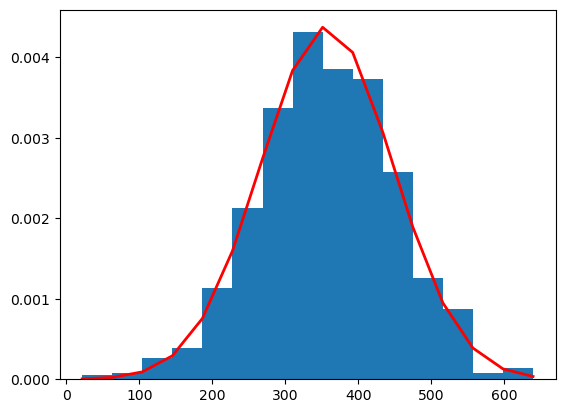

In [107]:
mu, sigma = 357 , 91 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## Q6: Use numpy to draw uniform distribution.

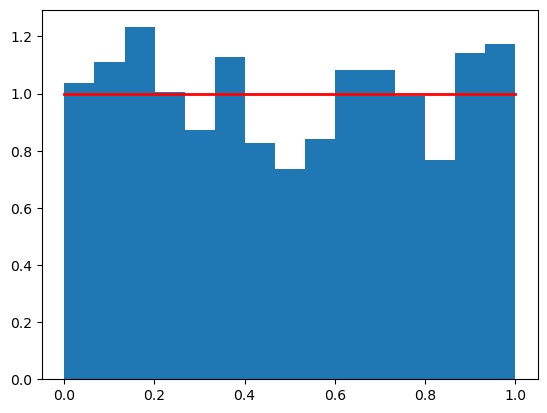

In [71]:
# since uniform distribution has high and low values then:
#(low, high, size)
uni = np.random.uniform(0,1,1000)
count, bins, ignored = plt.hist(uni, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

## Q7: Use numpy to draw binomial distribution.

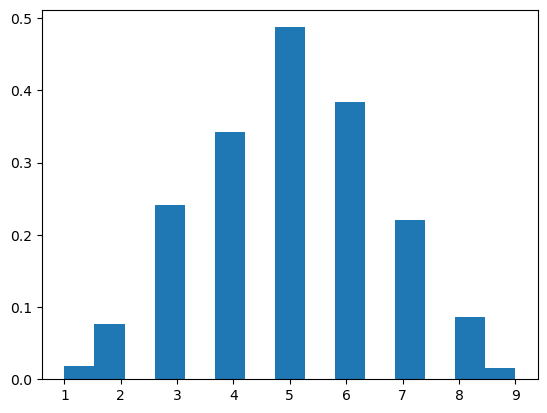

In [69]:
n, p = 10, .5  # number of trials, probability of each trial
bio = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.
count, bins, ignored = plt.hist(bio, 15, density=True)

plt.show()

## Q8: Simulate Two Coin Flips, then draw the result distribution.

In [103]:
# first without drawing because IDK how :/
import random

lis1=[]
lis2=[]

def flip_coin1():
    coin1 = ('Heads','Tails')
    return random.choice(coin1)
def flip_coin2():
    coin2 = ('Heads', 'Tails')
    return random.choice(coin2)


numFlips = int(input("How many flips you want in two coin? "))
for i in range(numFlips):
    print("Flip for first coin: "+ flip_coin1())
for j in range(numFlips):
    print("Flip for second coin: "+ flip_coin2())


How many flips you want in two coin? 3
Flip for first coin: Tails
Flip for first coin: Heads
Flip for first coin: Heads
Flip for second coin: Tails
Flip for second coin: Tails
Flip for second coin: Heads


Enter a number for flips: 6
[0, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 0]


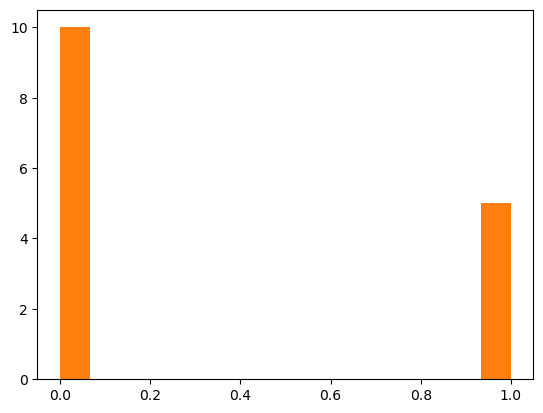

In [106]:
# second with draw but doesn`t give me like binomial distribution >:( 
import random
n = int(input ("Enter a number for flips: "))
lis1=[]
lis2=[]
for _ in range(n):
    k = random.randint(0, 1)
    a = random.randint(0, 1) # decide on a k each time the loop runs
    lis1.append(k)
    lis2.append(a)
print(lis1)
print(lis2)



count, bins, ignored = plt.hist(lis1, 15, density=True)
count, bins, ignored = plt.hist(lis2, 15, density=True)

plt.show()